In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_result.csv")

In [3]:
#Clean up column names
df.columns = df.columns.str.replace(r'\n', ' ', regex=True) 
df.columns = df.columns.str.strip()  
print("✅ Cleaned Column Names:")
print(df.columns.tolist())

✅ Cleaned Column Names:
['Timestamp', '1. How often do you shop online (Amazon, eBay, Zalando, etc.)?', 'Which delivery or logistics company most often handles your orders?', 'Where are you based', 'How long does it usually take for your online orders to arrive after purchase?', 'How satisfied are you with the delivery speed of your recent orders? (1 = Very Dissatisfied, 5 = Very Satisfied)', 'How often have you experienced late deliveries in the last 6 months?', 'When your delivery was late, what do you think was the most likely reason?', 'How often do your orders arrive with missing or incorrect items? E.g wrong size, wrong quantity or color', 'How satisfied are you with the condition of your packages when they arrive? (1 = Very Dissatisfied, 5 = Very Satisfied)', 'Do you believe warehouse and delivery staff have enough resources to handle large order volumes efficiently?', 'Which factor is most important to you when it comes to online order delivery?', 'Would you support the use of 

In [4]:
# Rename long columns to short names for easier use
df = df.rename(columns={
    '1. How often do you shop online (Amazon, eBay, Zalando, etc.)?': 'Shop_Frequency',
    'Which delivery or logistics company most often handles your orders?': 'Delivery_Company',
    'Where are you based': 'Location',
    'How long does it usually take for your online orders to arrive after purchase?': 'Delivery_Time',
    'How satisfied are you with the delivery speed of your recent orders? (1 = Very Dissatisfied, 5 = Very Satisfied)': 'Speed_Satisfaction',
    'How often have you experienced late deliveries in the last 6 months?': 'Late_Frequency',
    'When your delivery was late, what do you think was the most likely reason?': 'Late_Reason',
    'How often do your orders arrive with missing or incorrect items? E.g wrong size, wrong quantity or color': 'Wrong_Items',
    'How satisfied are you with the condition of your packages when they arrive? (1 = Very Dissatisfied, 5 = Very Satisfied)': 'Package_Satisfaction',
    'Do you believe warehouse and delivery staff have enough resources to handle large order volumes efficiently?': 'Enough_Resources',
    'Which factor is most important to you when it comes to online order delivery?': 'Priority_Factor',
    'Would you support the use of data analytics or AI if it made deliveries faster and more accurate?': 'AI_Support',
    'What improvements would you like to see in online order delivery services?': 'Improvement_Suggestions'
})


In [5]:
# Preview the first few rows 
print("\nFIRST 5 ROWS:")
print(df.head())



FIRST 5 ROWS:
                     Timestamp       Shop_Frequency Delivery_Company  \
0  2025/10/27 1:56:08 PM GMT+1               Weekly              DHL   
1  2025/10/27 2:23:32 PM GMT+1               Rarely              DHL   
2  2025/10/27 2:28:55 PM GMT+1               Rarely              DHL   
3  2025/10/27 2:33:35 PM GMT+1               Rarely              DHL   
4  2025/10/27 4:57:00 PM GMT+1  I Don’t Shop Online              DHL   

                 Location     Delivery_Time  Speed_Satisfaction  \
0  Other parts of Germany  More than 5 days                   3   
1                  Berlin          3-5 days                   5   
2         Outside Germany          3-5 days                   4   
3         Outside Germany  More than 5 days                   3   
4         Outside Germany          3-5 days                   3   

  Late_Frequency                       Late_Reason Wrong_Items  \
0      Sometimes  Weather or transportation issues      Rarely   
1          Never 

In [6]:
# Descriptive info
print("\n DATA INFO:")
print(df.info())



 DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                                                                                                     10 non-null     object
 1   Shop_Frequency                                                                                                                                                                                10 non-null     object
 2   Delivery

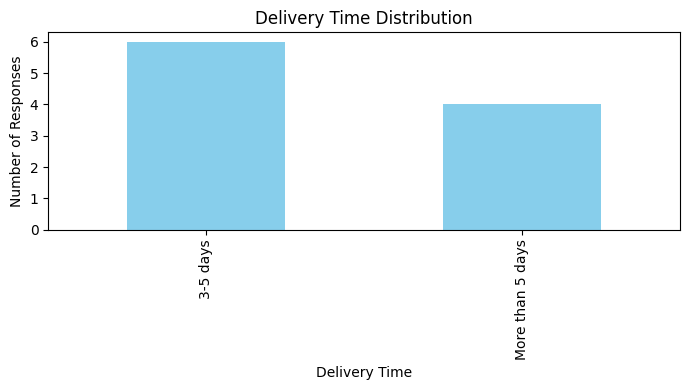

In [7]:
#Delivery time distribution
plt.figure(figsize=(7,4))
df['Delivery_Time'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.savefig('delivery_time_distribution.png')
plt.show()



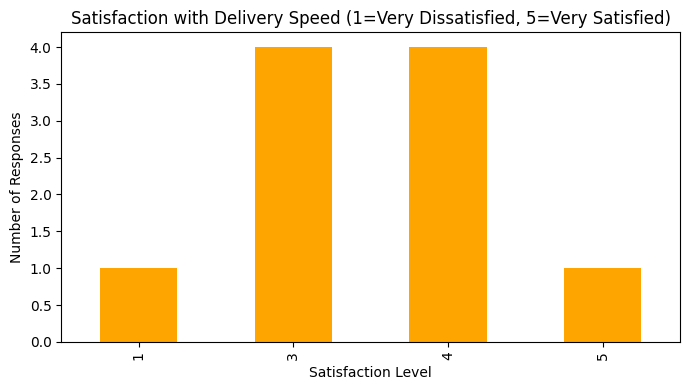

In [8]:
#Satisfaction with delivery speed
plt.figure(figsize=(7,4))
df['Speed_Satisfaction'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Satisfaction with Delivery Speed (1=Very Dissatisfied, 5=Very Satisfied)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.savefig('speed_satisfaction.png')
plt.show()


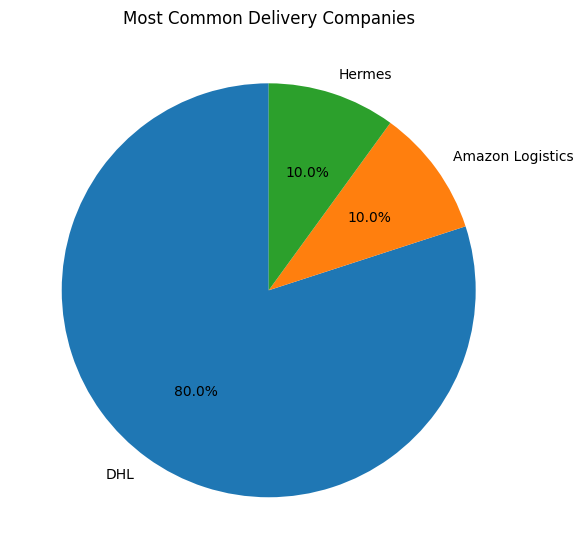

In [9]:
#Most used delivery company
plt.figure(figsize=(6,6))
df['Delivery_Company'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Most Common Delivery Companies')
plt.ylabel('')
plt.tight_layout()
plt.savefig('delivery_companies_pie.png')
plt.show()

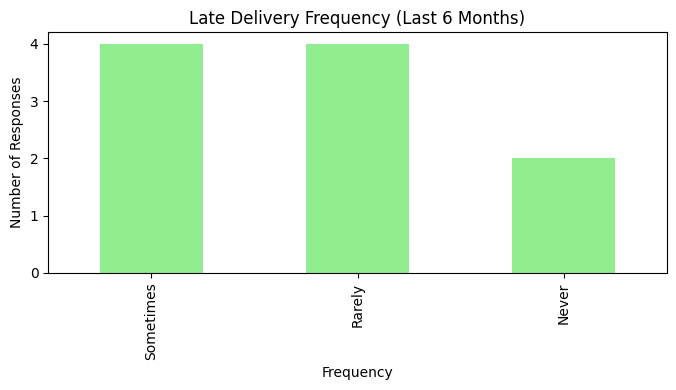

In [10]:
#Late deliveries frequency
plt.figure(figsize=(7,4))
df['Late_Frequency'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Late Delivery Frequency (Last 6 Months)')
plt.xlabel('Frequency')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.savefig('late_frequency.png')
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
#LOAD DATA AND VIEW FIRST 5 ROWS
df = pd.read_csv("logistics_dataset.csv")
print("===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== COLUMN NAMES =====")
print(df.columns.tolist())


===== FIRST 5 ROWS =====
    item_id    category  stock_level  reorder_point  reorder_frequency_days  \
0  ITM10000      Pharma          283             21                       4   
1  ITM10001  Automotive          301             52                       9   
2  ITM10002   Groceries          132             60                      11   
3  ITM10003  Automotive          346             46                      13   
4  ITM10004  Automotive           49             55                       4   

   lead_time_days  daily_demand  demand_std_dev  item_popularity_score  \
0               4         49.85            1.56                   0.43   
1               6         23.34            2.55                   0.69   
2               8         37.69            3.15                   0.62   
3               5         33.69            2.79                   0.21   
4               6         49.58            5.23                   0.31   

  storage_location_id  ... unit_price  holding_cost_per

In [13]:
#NUMERICAL ANALYSIS (DESCRIPTIVE STATISTICS)
print("\n===== NUMERICAL SUMMARY =====")
print(df.describe())


===== NUMERICAL SUMMARY =====
       stock_level  reorder_point  reorder_frequency_days  lead_time_days  \
count  3204.000000    3204.000000             3204.000000     3204.000000   
mean    263.491573      54.759363                8.507803        5.578340   
std     138.568360      26.053354                3.473229        2.292486   
min      20.000000      10.000000                3.000000        2.000000   
25%     144.000000      32.000000                5.000000        4.000000   
50%     264.000000      55.000000                9.000000        6.000000   
75%     386.000000      78.000000               12.000000        8.000000   
max     499.000000      99.000000               14.000000        9.000000   

       daily_demand  demand_std_dev  item_popularity_score  \
count   3204.000000     3204.000000            3204.000000   
mean      25.435868        5.260078               0.542325   
std       14.038861        2.725639               0.259200   
min        1.010000        

In [14]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric Columns Detected:", numeric_cols)


Numeric Columns Detected: ['stock_level', 'reorder_point', 'reorder_frequency_days', 'lead_time_days', 'daily_demand', 'demand_std_dev', 'item_popularity_score', 'picking_time_seconds', 'handling_cost_per_unit', 'unit_price', 'holding_cost_per_unit_day', 'stockout_count_last_month', 'order_fulfillment_rate', 'total_orders_last_month', 'turnover_ratio', 'layout_efficiency_score', 'forecasted_demand_next_7d', 'KPI_score']


In [15]:
# DATA CLEANING
print("\n===== DATA CLEANING =====")
print("Initial shape:", df.shape)


===== DATA CLEANING =====
Initial shape: (3204, 23)


In [16]:
# Remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (3204, 23)


In [17]:
#Handle missing values: fill numeric with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("After handling missing values:", df.isnull().sum().sum(), "missing values remaining")

After handling missing values: 0 missing values remaining


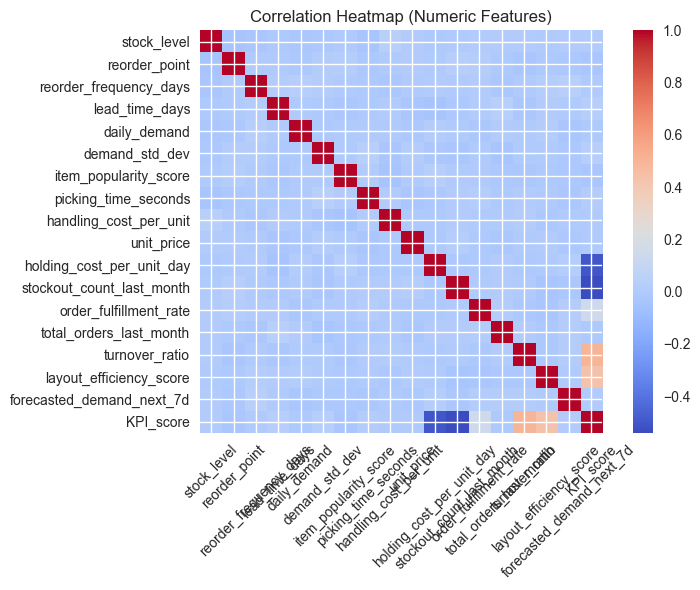

In [18]:
#VISUALIZATIONS
plt.style.use("seaborn-v0_8")

#Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.savefig("logistics_correlation_heatmap.png")
plt.show()


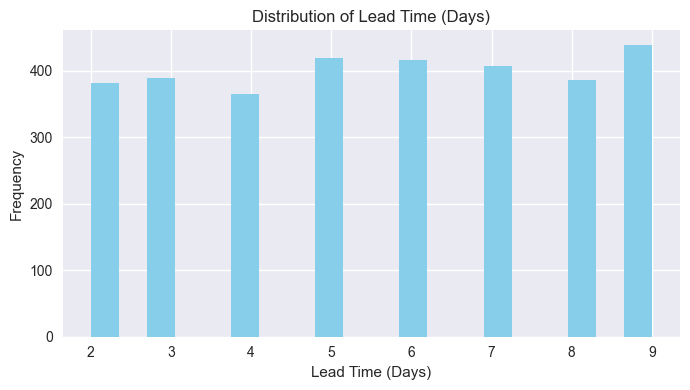

In [19]:
# Histogram: Lead Time
plt.figure(figsize=(7,4))
df['lead_time_days'].hist(bins=20, color="skyblue")
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("lead_time_hist.png")
plt.show()


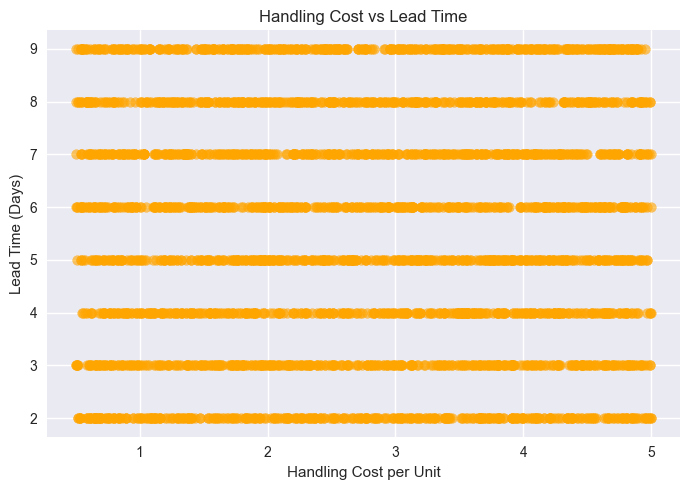

In [20]:
# Scatter: Handling cost vs Lead Time
plt.figure(figsize=(7,5))
plt.scatter(df['handling_cost_per_unit'], df['lead_time_days'], color="orange", alpha=0.6)
plt.title("Handling Cost vs Lead Time")
plt.xlabel("Handling Cost per Unit")
plt.ylabel("Lead Time (Days)")
plt.tight_layout()
plt.savefig("handling_cost_vs_lead_time.png")
plt.show()

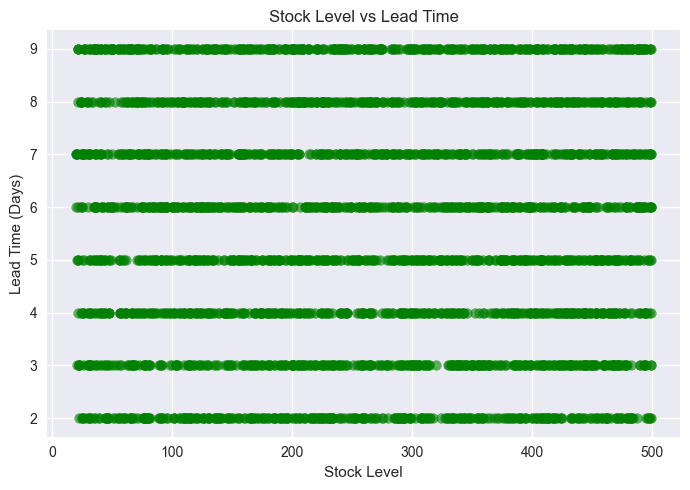

In [21]:
# Scatter: Stock Level vs Lead Time
plt.figure(figsize=(7,5))
plt.scatter(df['stock_level'], df['lead_time_days'], color="green", alpha=0.6)
plt.title("Stock Level vs Lead Time")
plt.xlabel("Stock Level")
plt.ylabel("Lead Time (Days)")
plt.tight_layout()
plt.savefig("stock_level_vs_lead_time.png")
plt.show()

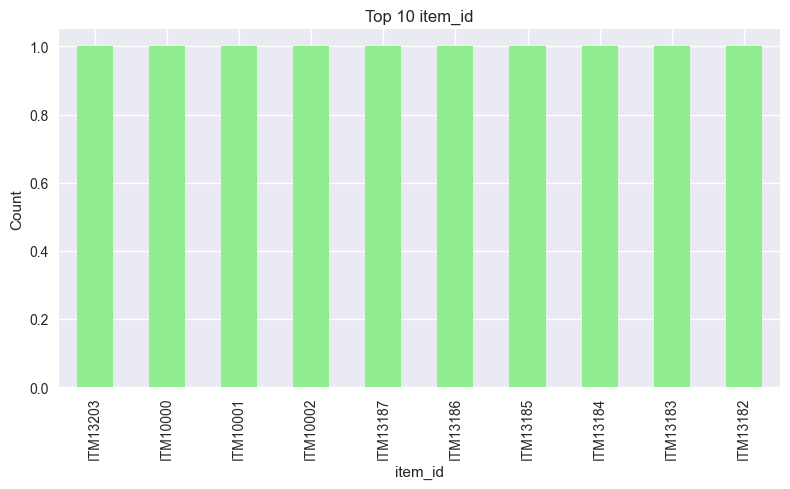

In [22]:
# Top 10 categories 
cat_cols = [c for c in df.columns if "category" in c.lower() or "product" in c.lower() or "item" in c.lower()]
if cat_cols:
    cat_col = cat_cols[0]
    plt.figure(figsize=(8,5))
    df[cat_col].value_counts().head(10).plot(kind="bar", color="lightgreen")
    plt.title(f"Top 10 {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("top10_categories.png")
    plt.show()

In [23]:
target_col = "lead_time_days"

# Select numeric features excluding target and ID/date
X = df[numeric_cols].drop(columns=[target_col, "item_id"], errors="ignore")
y = df[target_col]


In [24]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n===== MODEL EVALUATION =====")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



===== MODEL EVALUATION =====
Mean Absolute Error (MAE): 2.089
Mean Squared Error (MSE): 5.646
Root Mean Squared Error (RMSE): 2.376
R² Score: -0.012


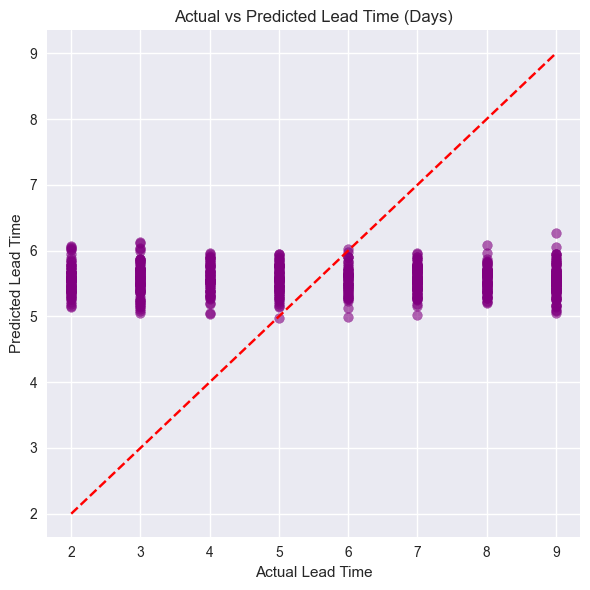

In [27]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Actual vs Predicted Lead Time (Days)")
plt.xlabel("Actual Lead Time")
plt.ylabel("Predicted Lead Time")
plt.tight_layout()
plt.savefig("actual_vs_predicted_lead_time.png")
plt.show()
